# Data exploration
 En este archivo se realiza toda la exploración y análisis de las bases de datos seleccionadas para el proyecto.

Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importación de las rutas de los csv

In [2]:
from global_variables import casos_ruta
from global_variables import edu_vial2018_ruta
from global_variables import encuesta_calidad_ruta
from global_variables import encuesta_cultura_ruta
from global_variables import hurto_tp_ruta
from global_variables import lesion_nf_ruta
from global_variables import mede_victimas_ruta
from global_variables import traffic_ruta
from global_variables import compar_ruta

Cargue de los csv

In [3]:
casos=pd.read_csv(casos_ruta, delimiter=";", encoding="utf-8")
edu_vial2018=pd.read_csv(edu_vial2018_ruta, delimiter=";", encoding="utf-8")
encuesta_calidad=pd.read_csv(encuesta_calidad_ruta, delimiter=";", encoding="utf-8")
encuesta_cultura=pd.read_csv(encuesta_cultura_ruta, delimiter=";", encoding="utf-8")
hurto_tp=pd.read_csv(hurto_tp_ruta, delimiter=";", encoding="utf-8")
lesion_nf=pd.read_csv(lesion_nf_ruta, delimiter=";", encoding="utf-8")
mede_victimas=pd.read_csv(mede_victimas_ruta, delimiter=";", encoding="utf-8")
traffic=pd.read_csv(traffic_ruta, delimiter=";", encoding="utf-8")
compar=pd.read_csv(compar_ruta, delimiter=";", encoding="utf-8")

C:\Users\Asus\AppData\Local\Temp\ipykernel_11368\2085568809.py:7: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,11,12,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  mede_victimas=pd.read_csv(mede_victimas_ruta, delimiter=";", encoding="utf-8")
C:\Users\Asus\AppData\Local\Temp\ipykernel_11368\2085568809.py:9: DtypeWarning: Columns (8,12) have mixed types. Specify dtype option on import or set low_memory=False.
  compar=pd.read_csv(compar_ruta, delimiter=";", encoding="utf-8")


## Data heads

In [4]:
casos.head(5)

,Fecha_hecho,Conducta,Codigo_comuna,Cantidad_casos
0,2003,Extorsión,3,1
1,2003,Extorsión,SIN DATO,143
2,2004,Extorsión,10,2
3,2004,Extorsión,13,1
4,2004,Extorsión,16,2


In [5]:
edu_vial2018.head(5)

,MES,FECHA,LÍNEAS DE TRABAJO - COMPONENTE,VERIFICACIÓN,ACCIONES,NOMBRE INSTITUCION/EMPRESA/EVENTO,PUBLICO OBJETIVO,TIPO EMPRESA/INSTITUCION/EVENTO,DIRECCION,COD_COMUNA,...,HOMBRE_PEATON,HOMBRE_CICLISTA,HOMBRE_MOTOCICLISTA,HOMBRE_CONDUCTOR,HOMBRE_ACOMPANANTE_ Y/O_ PASAJERO,No. DE PROFESIONALES VINCULADOS,No. DE AUXILIARES VINCULADOS,No. DE PROFESIONALES CONTRATISTAS,No. DE AUXILIARES CONTRATISTAS,NO. HORAS LABORADAS EN ACTIVIDAD
0,Noviembre,2019-11-28T05:00:00.000Z,Contacto_Ciudadano_Priorización_de_Publicos_y_...,Contacto_Priorizacion,Punto_Seguro_Peatones,Secretaría de Movilidad,Peatones,Intervención en Vía,Cr 43 A 34 95,10,...,7.0,44,0.0,0.0,8,0.0,0.0,0,1,6
1,Noviembre,2019-11-28T05:00:00.000Z,Experiencias_Ciudadanas_Empresas,Experiencias_Empresas,Taller_Formativo_Empresas_de_Transporte_Public...,Secretaria de Movilidad soy un taxista comprom...,Conductores,Intervención en Vía,Cl 27 46 70,14,...,0.0,6,0.0,0.0,103,0.0,0.0,0,1,0
2,Noviembre,2019-11-28T05:00:00.000Z,Experiencias_Ciudadanas_Instituciones_Educativas,Experiencias_IES,Otros_Instituciones_Educativas,Institución Educativa Lola Gonzalez - Caravana...,Peatones,Instituciones Educativas Oficiales,Cl 47 F 94 63,12,...,6.0,23,0.0,0.0,0,0.0,0.0,0,1,4
3,Noviembre,2019-11-28T05:00:00.000Z,Contacto_Ciudadano_Priorización_de_Publicos_y_...,Contacto_Priorizacion,Punto_Seguro_Vehiculos,Secretaria de seguridad y Convivencia,Motociclistas,Intervención en Vía,Cr 55 94 1,4,...,4.0,0,0.0,104.0,0,5.0,0.0,0,1,2
4,Noviembre,2019-11-29T05:00:00.000Z,Incidencia_y_Gestion_Ejecucion_de_Experiencias,Incidencia,Otros_Incidencia_y_Gestion,Secretaría de Movilidad y Secretaría de inclus...,Peatones,Actividades Comunitarias,Cl 98 A 65 160,5,...,18.0,18,0.0,0.0,0,0.0,0.0,0,2,2


In [6]:
encuesta_calidad.head(5)

,varcharidcomunafk,intaño,decentornocalidadvivienda,decaccesoserviciospublicos,decmedioambiente,decescolaridad,decdescolarizacion,decmovilidad,deccapitalfisicohogar,decparticipacion,declibertadseguridad,decvulnerabilida,decsalud,dectrabajo,decrecreacion,decpercepcioncalidadvida,decingresos,decimcv
0,1,2011,1.380000,3.570000,2.510000,1.470000,3.880000,1.370000,3.310000,1.100000,1.840000,6.350000,2.550000,0.510000,0.190000,1.2500,0.780000,32.06
1,1,2012,1.390000,3.610000,2.280000,1.590000,3.900000,1.350000,3.680000,0.810000,1.590000,6.900000,2.620000,0.520000,0.330000,1.4000,0.960000,32.88
2,1,2013,1.390000,3.570000,2.250000,1.580000,3.910000,1.400000,3.830000,0.960000,1.850000,6.690000,2.650000,0.570000,0.050000,1.3600,1.100000,33.27
3,1,2014,1.411854,3.589982,2.121174,1.603315,3.975634,1.295639,3.739863,1.000021,1.599736,6.952948,2.569105,0.552032,0.058456,1.2784,1.121182,32.82
4,1,2015,1.237000,3.607000,1.753000,1.811000,4.146000,1.262000,3.667000,1.098000,1.729000,7.018000,3.041000,0.485000,0.067000,1.3550,1.039000,33.53


In [7]:
encuesta_cultura.head(5)

,id,formulario,factor_fex,ciudad,fecha,idm,seccion,sexo,annos,annos2,...,ma_conoc_estrategia_2,ma_conoc_estrategia_3,ma_conoc_estrategia_4,ma_conoc_estrategia_5,ma_conoc_estrategia_6,ma_conoc_estrategia_8,ma_conoc_estrategia_9,ma_conoc_estrategia_10,p_77,p_78
0,891,36572725,425.810455,Medellín,2019-09-08,350,71304,Mujer,33,Juventud,...,False,False,False,False,NaN,NaN,NaN,NaN,5,51
1,2131,35832071,665.512868,Medellín,2019-08-27,115,30901,Mujer,23,Juventud,...,False,False,False,False,NaN,NaN,NaN,NaN,2,23
2,334,35906436,1049.494241,Medellín,2019-08-28,157,41004,Mujer,52,Adultez,...,False,False,False,False,Contribuido a que los ciudadanos sean más resp...,En desacuerdo,De acuerdo,En desacuerdo,2,26
3,716,35830221,1019.187114,Medellín,2019-08-27,430,90304,Mujer,34,Juventud,...,True,True,False,False,Contribuido a que los ciudadanos sean más resp...,De acuerdo,Completamente de acuerdo,De acuerdo,5,52
4,1984,36707695,3607.085529,Medellín,2019-09-10,646,130101,Hombre,32,Juventud,...,False,False,False,False,NaN,NaN,NaN,NaN,2,23


In [8]:
hurto_tp.head(5)

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,codigo_comuna,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida
0,2017-01-01T16:00:00.000-05:00,1.0,6.276236,-75.553533,Hombre,37,Casado(a),Sin dato,Sin dato,Sin dato,...,4,Vía pública,Aranjuez,Celular,Tecnología,Mercancía,-1,Negro,Sin dato,Sin dato
1,2017-01-01T16:00:00.000-05:00,1.0,6.219071,-75.602996,Mujer,29,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,16,Vía pública,Belén,Elementos escolares,Elementos escolares,Mercancía,-1,Sin dato,Sin dato,Sin dato
2,2017-01-01T16:00:00.000-05:00,1.0,6.219071,-75.602996,Mujer,29,Unión marital de hecho,Sin dato,Sin dato,Sin dato,...,16,Vía pública,Belén,Computador,Tecnología,Mercancía,-1,Sin dato,Sin dato,Sin dato
3,2017-01-02T10:30:00.000-05:00,1.0,6.242754,-75.548365,Hombre,36,Casado(a),Sin dato,Sin dato,Sin dato,...,8,Vía pública,Villa Hermosa,Peso,"Dinero, joyas, piedras preciosas y título valor",Mercancía,-1,Sin dato,Sin dato,Sin dato
4,2017-01-02T10:30:00.000-05:00,1.0,6.242754,-75.548365,Hombre,36,Casado(a),Sin dato,Sin dato,Sin dato,...,8,Vía pública,Villa Hermosa,Celular,Tecnología,Mercancía,-1,Blanco,Sin dato,Sin dato


In [9]:
lesion_nf.head(5)

,fecha_hecho,cantidad,latitud,longitud,sexo,edad,estado_civil,grupo_actor,actividad_delictiva,parentesco,...,lugar,sede_receptora,bien,categoria_bien,grupo_bien,modelo,color,permiso,unidad_medida,fecha_ingestion
0,2003-01-03T02:45:00.000-05:00,1.0,6.238715,-75.603948,Hombre,30,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,Laureles,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,2023-08-06T04:05:48.000-05:00
1,2003-01-14T20:30:00.000-05:00,1.0,NaN,NaN,Hombre,28,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,Laureles,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,2023-08-06T04:05:48.000-05:00
2,2003-01-14T20:30:00.000-05:00,1.0,NaN,NaN,Hombre,-1,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,Laureles,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,2023-08-06T04:05:48.000-05:00
3,2003-01-14T20:30:00.000-05:00,1.0,NaN,NaN,Hombre,25,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,Laureles,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,2023-08-06T04:05:48.000-05:00
4,2003-01-14T15:00:00.000-05:00,1.0,6.296872,-75.570754,Hombre,35,Sin dato,Sin dato,Sin dato,Sin dato,...,Sin dato,Castilla,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,Sin dato,2023-08-06T04:05:48.000-05:00


In [10]:
mede_victimas.head(5)

,Gravedad_victima,Fecha_incidente,Hora_incidente,Clase_incidente,Direccion_incidente,Sexo,Edad,Condicion,Mes,Dia,Num_dia,Hora,Grupo_edad,Año,Radicado,Latitud,Longitud,Comuna,Barrio
0,Heridos,1/01/2014,00:15:00,Otro,CR 49 CL 72,M,17,Motociclista,Ene,Mié,1.0,0,10 - 19,2014.0,1423940,"6,26691466","-75,5590994",04 - Aranjuez,Manrique Central No. 1
1,Heridos,1/01/2014,00:30:00,Atropello,CR 46 CL 98,M,20,Motociclista,Ene,Mié,1.0,0,20 - 29,2014.0,1423921,"6,289353458","-75,55329197",01 - Popular,Moscú No. 2
2,Heridos,1/01/2014,00:30:00,Atropello,CR 46 CL 98,F,18,Peatón,Ene,Mié,1.0,0,10 - 19,2014.0,1423921,"6,289353458","-75,55329197",01 - Popular,Moscú No. 2
3,Heridos,1/01/2014,00:37:00,Atropello,CL 32 CR 84,M,19,Motociclista,Ene,Mié,1.0,0,10 - 19,2014.0,1423849,"6,234327372","-75,60761079",16 - Belén,Las Mercedes
4,Heridos,1/01/2014,00:37:00,Atropello,CL 32 CR 84,M,39,Peatón,Ene,Mié,1.0,0,30 - 39,2014.0,1423849,"6,234327372","-75,60761079",16 - Belén,Las Mercedes


In [11]:
traffic.head(5)

,DATA.CLASIFICACION1,DATA.CLASIFICACION2,DATA.CLASIFICACION3,FECHAHORA,HEADWAY,INTENSIDAD,OCUPACION,REGISTROS,VELOCIDAD,INDRA.CONSECUTIVO,...,INDRA.PARAMETRO,INDRA.TIMESTAMP,INDRA.TIPO,INDRA.VERSION,ANO,CORREDOR,DISPOSITIVO,LOCATION,MES,SENTIDO
0,10,0,1,2021-01-01T00:00:00.000Z,27272,11,13,4,0.0,359833,...,NaN,2020-12-31T23:59:58.000Z,TrafficData,1.2 (2020.10.13),2021,Carrera 70,CCTV,"{'lon': '-75.591957', 'lat': '6.222705'}",Enero,SN
1,38,7,1,2021-01-01T00:00:00.000Z,6521,46,34,5,24.0,359833,...,NaN,2020-12-31T23:59:58.000Z,TrafficData,1.2 (2020.10.13),2021,Carrera 70,CCTV,"{'lon': '-75.591957', 'lat': '6.222705'}",Enero,SN
2,14,0,0,2021-01-01T00:00:00.000Z,21428,14,14,4,7.0,359833,...,NaN,2020-12-31T23:59:58.000Z,TrafficData,1.2 (2020.10.13),2021,Carrera 70,CCTV,"{'lon': '-75.591957', 'lat': '6.222705'}",Enero,SN
3,42,1,0,2021-01-01T00:00:00.000Z,6976,43,12,5,82.0,359833,...,NaN,2020-12-31T23:59:58.000Z,TrafficData,1.2 (2020.10.13),2021,Avenida Regional,CCTV,"{'lon': '-75.580276', 'lat': '6.197217'}",Enero,SN
4,59,2,1,2021-01-01T00:00:00.000Z,4838,62,15,5,77.0,359833,...,NaN,2020-12-31T23:59:58.000Z,TrafficData,1.2 (2020.10.13),2021,Avenida Regional,CCTV,"{'lon': '-75.580276', 'lat': '6.197217'}",Enero,SN


In [12]:
compar.head(5)

,anio_imposicion,mes_imposicion,fecha_comparendo,hora_comparendo,tipo_comparendo,direccion_comparendo,descripcion_tipo_via,numero_via,letra_via,descripcion_cardinal_via,...,descripcion_cardinal_via_cruce,descripcion_zona,retenido,policia_carretera,reporta_fuga,descripcion_servicio,modelo,descripcion_clase,descripcion_infraccion,codigo_infraccion
0,2018,OCTUBRE,14/10/2018,9:27:41,Electrónico,Calle 18 con Carrera 23,Calle,18.0,NaN,NaN,...,NaN,CARRETERA LAS PALMAS Jurisdicción,NaN,N,N,PARTICULAR,2006.0,AUTOMOVIL,Conducir un vehículo a velocidad superior a la...,C29
1,2018,OCTUBRE,14/10/2018,16:10:13,Electrónico,Carrera 52 con Calle 17,Carrera,52.0,NaN,NaN,...,NaN,COMUNA 15,NaN,N,N,PARTICULAR,2013.0,MOTOCICLETA,No realizar la revisión tecnicomecánica y de e...,C35
2,2018,OCTUBRE,14/10/2018,19:49:22,Infracción,Carrera 39 Calle 7 MEDELLIN - Comuna 14,Carrera,39.0,NaN,NaN,...,NaN,COMUNA 14,S,N,N,PARTICULAR,2013.0,AUTOMOVIL,Inmovilización por abandono,299
3,2018,OCTUBRE,14/10/2018,12:25:57,Infracción,Carrera 64 C Calle 72 MEDELLIN - Comuna 5,Carrera,64.0,C,NaN,...,NaN,COMUNA 5,S,N,N,PUBLICO,0.0,BUS,No realizar la revisión tecnicomecánica y de e...,C35
4,2018,OCTUBRE,14/10/2018,12:37:48,Electrónico,Carrera 49 con Calle 17 A Sur,Carrera,49.0,NaN,NaN,...,Sur,COMUNA 14,NaN,N,N,PARTICULAR,2008.0,MOTOCICLETA,Conducir sin portar los seguros ordenados por ...,D2


## Data exploration process

### Análisis de casos de delitos

In [13]:
casos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fecha_hecho     2441 non-null   int64 
 1   Conducta        2441 non-null   object
 2   Codigo_comuna   2441 non-null   object
 3   Cantidad_casos  2441 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 76.4+ KB


In [15]:
casos = casos.drop(casos[casos["Codigo_comuna"] == "SIN DATO"].index)

In [16]:
casos["Codigo_comuna"] = casos["Codigo_comuna"].astype(float)
casos["Codigo_comuna"] = casos["Codigo_comuna"].astype(int)

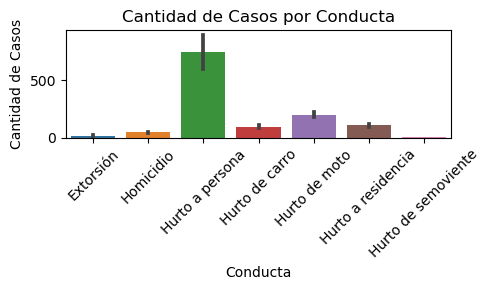

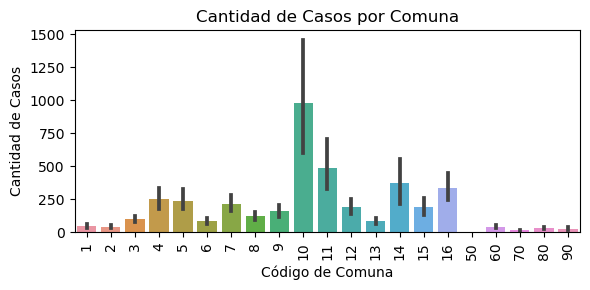

In [17]:
# Gráfico de barras: Cantidad de casos por conducta
plt.figure(figsize=(5, 3))
sns.barplot(x='Conducta', y='Cantidad_casos', data=casos)
plt.title('Cantidad de Casos por Conducta')
plt.xticks(rotation=45)
plt.xlabel('Conducta')
plt.ylabel('Cantidad de Casos')
plt.tight_layout()
plt.show()

# Gráfico de barras: Cantidad de casos por comuna
plt.figure(figsize=(6, 3))
sns.barplot(x='Codigo_comuna', y='Cantidad_casos', data=casos)
plt.title('Cantidad de Casos por Comuna')
plt.xlabel('Código de Comuna')
plt.ylabel('Cantidad de Casos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Análsis de eduación vial 2018

In [18]:
edu_vial2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   MES                                   2128 non-null   object 
 1   FECHA                                 2128 non-null   object 
 2   LÍNEAS DE TRABAJO - COMPONENTE        2128 non-null   object 
 3   VERIFICACIÓN                          2108 non-null   object 
 4   ACCIONES                              2128 non-null   object 
 5   NOMBRE INSTITUCION/EMPRESA/EVENTO     2128 non-null   object 
 6   PUBLICO OBJETIVO                      2127 non-null   object 
 7   TIPO EMPRESA/INSTITUCION/EVENTO       2128 non-null   object 
 8   DIRECCION                             2127 non-null   object 
 9   COD_COMUNA                            2128 non-null   int64  
 10  COMUNA                                2128 non-null   object 
 11  BARRIO           

In [19]:
edu_vial2028 = edu_vial2018.drop(edu_vial2018.columns[[0,2,3,5,7,8,10,11,31,32,33,34,35]], axis=1)
edu_vial2018

,MES,FECHA,LÍNEAS DE TRABAJO - COMPONENTE,VERIFICACIÓN,ACCIONES,NOMBRE INSTITUCION/EMPRESA/EVENTO,PUBLICO OBJETIVO,TIPO EMPRESA/INSTITUCION/EVENTO,DIRECCION,COD_COMUNA,...,HOMBRE_PEATON,HOMBRE_CICLISTA,HOMBRE_MOTOCICLISTA,HOMBRE_CONDUCTOR,HOMBRE_ACOMPANANTE_ Y/O_ PASAJERO,No. DE PROFESIONALES VINCULADOS,No. DE AUXILIARES VINCULADOS,No. DE PROFESIONALES CONTRATISTAS,No. DE AUXILIARES CONTRATISTAS,NO. HORAS LABORADAS EN ACTIVIDAD
0,Noviembre,2019-11-28T05:00:00.000Z,Contacto_Ciudadano_Priorización_de_Publicos_y_...,Contacto_Priorizacion,Punto_Seguro_Peatones,Secretaría de Movilidad,Peatones,Intervención en Vía,Cr 43 A 34 95,10,...,7.0,44,0.0,0.0,8,0.0,0.0,0,1,6
1,Noviembre,2019-11-28T05:00:00.000Z,Experiencias_Ciudadanas_Empresas,Experiencias_Empresas,Taller_Formativo_Empresas_de_Transporte_Public...,Secretaria de Movilidad soy un taxista comprom...,Conductores,Intervención en Vía,Cl 27 46 70,14,...,0.0,6,0.0,0.0,103,0.0,0.0,0,1,0
2,Noviembre,2019-11-28T05:00:00.000Z,Experiencias_Ciudadanas_Instituciones_Educativas,Experiencias_IES,Otros_Instituciones_Educativas,Institución Educativa Lola Gonzalez - Caravana...,Peatones,Instituciones Educativas Oficiales,Cl 47 F 94 63,12,...,6.0,23,0.0,0.0,0,0.0,0.0,0,1,4
3,Noviembre,2019-11-28T05:00:00.000Z,Contacto_Ciudadano_Priorización_de_Publicos_y_...,Contacto_Priorizacion,Punto_Seguro_Vehiculos,Secretaria de seguridad y Convivencia,Motociclistas,Intervención en Vía,Cr 55 94 1,4,...,4.0,0,0.0,104.0,0,5.0,0.0,0,1,2
4,Noviembre,2019-11-29T05:00:00.000Z,Incidencia_y_Gestion_Ejecucion_de_Experiencias,Incidencia,Otros_Incidencia_y_Gestion,Secretaría de Movilidad y Secretaría de inclus...,Peatones,Actividades Comunitarias,Cl 98 A 65 160,5,...,18.0,18,0.0,0.0,0,0.0,0.0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2123,Abril,2019-04-12T05:00:00.000Z,Contacto_Ciudadano_Priorización_de_Publicos_y_...,Contacto_Priorizacion,Punto_Seguro_Vehiculos,Secretaría de Movilidad - Cultas,Motociclistas,Intervención en Vía,Cr 38 26 433,10,...,0.0,0,0.0,172.0,12,11.0,0.0,0,1,5
2124,Abril,2019-04-13T05:00:00.000Z,Contacto_Ciudadano_Priorización_de_Publicos_y_...,Contacto_Priorizacion,Otros_Contacto_Ciudadano,Secretaría de Movilidad,Peatones,Apoyo a Intervenciones Externas,Cl 9 SUR 10 A 4,15,...,2.0,55,0.0,0.0,0,0.0,0.0,0,2,2
2125,Abril,2019-04-22T05:00:00.000Z,Contacto_Ciudadano_Priorización_de_Publicos_y_...,Contacto_Priorizacion,Socializacion_Proyectos_Movilidad_Conglomerado...,Institucion Educativa CEFA,Personal Administrativo ó Gerencial,Instituciones Educativas Oficiales,Cl 50 41 55,10,...,0.0,0,0.0,0.0,0,0.0,0.0,1,0,0
2126,Abril,2019-04-23T05:00:00.000Z,Incidencia_y_Gestion_Ejecucion_de_Experiencias,Incidencia,Dia_Sin_Carro,Secretaría de Movilidad,Ciclistas,Acuerdo Municipal,CL 67 52 20,4,...,0.0,0,226.0,0.0,0,0.0,0.0,0,1,0


### Victimas de Incidentes Viales en Medellín

Heridos    233894
Muertos      1949
Name: Gravedad_victima, dtype: int64


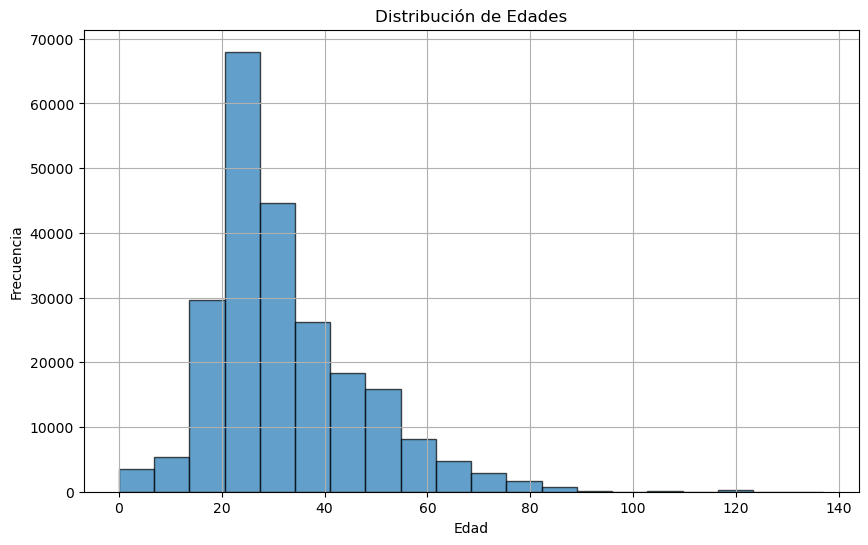

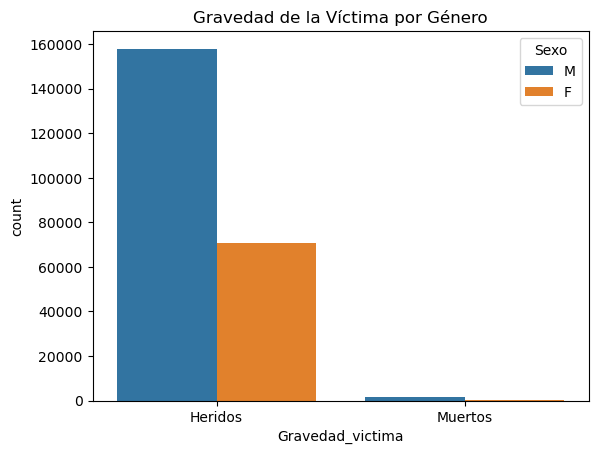

In [20]:
print(mede_victimas['Gravedad_victima'].value_counts())
mede_victimas = mede_victimas.dropna()
columns_to_check = ['Sexo', 'Edad']

for column in columns_to_check:
    mede_victimas = mede_victimas[(mede_victimas[column] != 'Sin Inf') & (mede_victimas[column] != 'Sin inf')]

import re

def convert_age_to_int(age_str):
    if isinstance(age_str, str) and '-' in age_str:
        ages = re.findall(r'\d+', age_str)  # Extraer los números del rango
        return (int(ages[0]) + int(ages[1])) // 2  # Promedio de los valores del rango
    else:
        return int(age_str)  # Si es un valor único, simplemente conviértelo a entero

# Eliminar filas con valores NaN en la columna 'Edad'


mede_victimas['Edad'] = mede_victimas['Edad'].apply(convert_age_to_int)
mede_victimas['Edad'].unique()

# Distribución de edades

plt.figure(figsize=(10, 6))
plt.hist(mede_victimas['Edad'], bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades')
plt.grid(True)
plt.show()

# Relación entre gravedad de la víctima y género

sns.countplot(x='Gravedad_victima', hue='Sexo', data=mede_victimas)
plt.title('Gravedad de la Víctima por Género')
plt.show()